<a href="https://colab.research.google.com/github/wqiu96/MA574_Portfolio-Valuation-and-Risk-Management/blob/master/src/ARMR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/wqiu96/MA574_Portfolio-Valuation-and-Risk-Management.git

Cloning into 'MA574_Portfolio-Valuation-and-Risk-Management'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 82 (delta 19), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (82/82), done.


In [2]:
cd MA574_Portfolio-Valuation-and-Risk-Management/src

/content/MA574_Portfolio-Valuation-and-Risk-Management/src


In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
Apple = pd.read_csv('AAPL.csv')
GDP = pd.read_excel('The GDP QoQ of US.xlsx')
unemployment= pd.read_excel('US unemployment rate.xlsx')
Apple_Log_return = pd.DataFrame(data = [np.log(Apple['Adj Close'][i]/Apple['Adj Close'][i-1]) for i in range(445,501)],columns = ['Apple_log_return'])

In [0]:
def proper_model(data_ts, maxLag,d): 
    init_bic = float("inf")
    init_p = 0
    init_q = 0
    init_properModel = None
    for p in np.arange(maxLag):
        for q in np.arange(maxLag):
          #if p!=q:
            model = ARIMA(data_ts, order=(p,d,q))
            try:
                results_ARIMA = model.fit(disp=-1, method="css") #“css” is the conditional sum of squares loglikelihood is maximized
            except:
                continue
            bic = results_ARIMA.bic
            if bic < init_bic:
                init_p = p
                init_q = q
                init_properModel = results_ARIMA
                init_bic = bic
    return init_bic, init_p, init_q, init_properModel

Apple_bic: -257.07364827186774 Apple_p: 0 Apple_q: 1 Apple_d: 1
True value for the last 4 days: 
52   -0.011348
53    0.006688
54    0.016790
55   -0.001293
Name: Apple_log_return, dtype: float64
Forecast value for the last 4 days: 
52    0.001269
53    0.001297
54    0.001325
55    0.001354
Name: forecast, dtype: float64


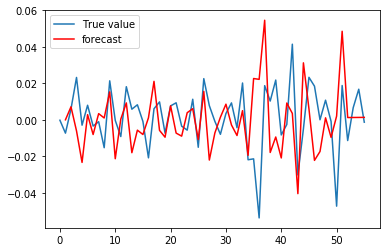

In [203]:
forecast_n = 4
Apple_bic, Apple_p, Apple_q, Apple_properModel = proper_model(Apple_Log_return['Apple_log_return'][0:52], 3,1)
print("Apple_bic: "+str(Apple_bic), "Apple_p: "+str(Apple_p), "Apple_q: "+str(Apple_q), "Apple_d: "+str(1))
forecast_Apple = Apple_properModel.forecast(forecast_n)
forecast_Apple = np.array(forecast_Apple[0])
Apple_Log_return['forecast'] = np.concatenate((np.array([0]),np.concatenate((Apple_properModel.fittedvalues.values,forecast_Apple))))
plt.plot(Apple_Log_return['Apple_log_return'],label = "True value")
plt.plot(Apple_Log_return['forecast'][1:56], color='red',label = "forecast")
plt.legend()
print("True value for the last 4 days: ")
print(Apple_Log_return['Apple_log_return'][52:56])
print("Forecast value for the last 4 days: ")
print(Apple_Log_return['forecast'][52:56])

GDP_bic: 329.7929868133235 GDP_p: 2 GDP_q: 0 GDP_d: 1
72
True value for the last 4 days: 
73    0.5
74    7.5
75    1.5
76    7.0
Name: Last Price, dtype: float64
Forecast value for the last 4 days: 
73    1.534503
74    1.630872
75    1.789429
76    1.853566
Name: forecast, dtype: float64


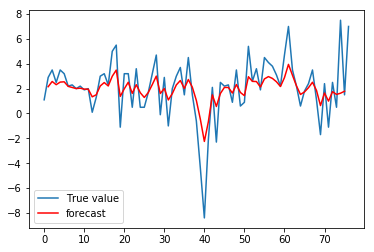

In [215]:
forecast_n = 4
GDP_bic, GDP_p, GDP_q, GDP_properModel = proper_model(GDP['Last Price'][0:74], 3,0)
print("GDP_bic: "+str(GDP_bic), "GDP_p: "+str(GDP_p), "GDP_q: "+str(GDP_q), "GDP_d: "+str(1))
forecast_GDP = GDP_properModel.forecast(forecast_n)
forecast_GDP = np.array(forecast_GDP[0])
print(len(GDP_properModel.fittedvalues.values))
GDP['forecast'] = np.concatenate((np.array([0]),np.concatenate((GDP_properModel.fittedvalues.values,forecast_GDP))))
plt.plot(GDP['Last Price'],label = "True value")
plt.plot(GDP['forecast'][1:-1], color='red',label = "forecast")
plt.legend()
print("True value for the last 4 days: ")
print(GDP['Last Price'][73:77])
print("Forecast value for the last 4 days: ")
print(GDP['forecast'][73:77])

In [217]:
print(len(unemployment))

77


unemployment_bic: -4.756651042927576 unemployment_p: 2 unemployment_q: 0 unemployment_d: 1
72
True value for the last 4 days: 
73    4.00
74    3.93
75    4.03
76    4.07
Name: Mid Price, dtype: float64
Forecast value for the last 4 days: 
73    4.143980
74    4.317022
75    4.506836
76    4.703518
Name: forecast, dtype: float64


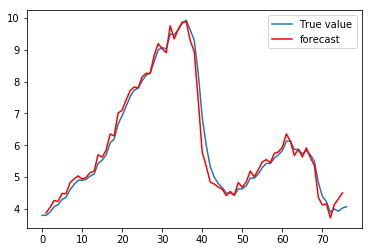

In [221]:
forecast_n = 4
unemployment_bic, unemployment_p, unemployment_q, unemployment_properModel = proper_model(unemployment['Mid Price'][0:74], 3,0)
print("unemployment_bic: "+str(unemployment_bic), "unemployment_p: "+str(unemployment_p), "unemployment_q: "+str(unemployment_q), "unemployment_d: "+str(1))
forecast_unemployment = unemployment_properModel.forecast(forecast_n)
forecast_unemployment = np.array(forecast_unemployment[0])
print(len(unemployment_properModel.fittedvalues.values))
unemployment['forecast'] = np.concatenate((np.array([0]),np.concatenate((unemployment_properModel.fittedvalues.values,forecast_unemployment))))
plt.plot(unemployment['Mid Price'],label = "True value")
plt.plot(unemployment['forecast'][1:-1], color='red',label = "forecast")
plt.legend()
print("True value for the last 4 days: ")
print(unemployment['Mid Price'][73:77])
print("Forecast value for the last 4 days: ")
print(unemployment['forecast'][73:77])

In [230]:
#test(ADF) stationary
def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    return dftest[1]
print("Apple stationary test: " + str(test_stationarity(Apple_Log_return['Apple_log_return'])))
print("GDP stationary test: " + str(test_stationarity(GDP['Last Price'])))
print("unemployment stationary test: " + str(test_stationarity(unemployment['Mid Price'])))

Apple stationary test: 6.232746499200026e-14
GDP stationary test: 0.00245825990525557
unemployment stationary test: 0.12914239018363938


In [227]:
#test stochastic
from statsmodels.stats.diagnostic import acorr_ljungbox
def test_stochastic(ts):
    p_value = acorr_ljungbox(ts, lags=1)[1]
    return p_value
print("Apple stochastic test: " + str(test_stochastic(Apple_Log_return['Apple_log_return'])))
print("GDP stochastic test: " + str(test_stochastic(GDP['Last Price'])))
print("unemployment stochastic test: " +str(test_stochastic(unemployment['Mid Price'])))

Apple stochastic test: [0.1990055]
GDP stochastic test: [0.00868533]
unemployment stochastic test: [4.97488739e-18]
